<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/modisco/CrossCorr_vs_ContinJacc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y modisco
%cd /content/
!rm -rf tfmodisco
!git clone https://github.com/kundajelab/tfmodisco.git
%cd /content/tfmodisco
#!git checkout exposition
!git checkout exposition
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

import modisco
reload(modisco)

/content
Cloning into 'tfmodisco'...
remote: Enumerating objects: 5910, done.
remote: Counting objects: 100% (536/536), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 5910 (delta 330), reused 521 (delta 323), pack-reused 5374
Receiving objects: 100% (5910/5910), 246.29 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (3677/3677), done.
/content/tfmodisco
Branch 'exposition' set up to track remote branch 'exposition' from 'origin'.
Switched to a new branch 'exposition'
commit 762a5cc787d7dda8d230460e7b17368fb9d59ff6 (HEAD -> exposition, origin/exposition)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Oct 6 16:48:13 2021 -0700

    name fix
Processing /content/tfmodisco
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.5 MB/s eta 0:00:00
  Created wheel for modisco: filename=modisco-0.5.15.0-py3-none-any.whl size=232386 sh

<module 'modisco' from '/usr/local/lib/python3.10/dist-packages/modisco/__init__.py'>

In [2]:
!pip uninstall -y simdna
%cd /content/
!rm -rf simdna
!git clone https://github.com/kundajelab/simdna.git
%cd /content/simdna
!git checkout dev
!git log -1
!pip install .
%cd /content/

from importlib import reload
%load_ext autoreload
%autoreload 2

/content
Cloning into 'simdna'...
remote: Enumerating objects: 1237, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1237 (delta 57), reused 49 (delta 49), pack-reused 1172
Receiving objects: 100% (1237/1237), 3.94 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (744/744), done.
/content/simdna
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit e8488eba5eae123bc798bcbbdbc580497352608b (HEAD -> dev, origin/dev)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Sep 29 17:20:03 2021 -0700

    super fix
Processing /content/simdna
  Preparing metadata (setup.py) ... done
  Created wheel for simdna: filename=simdna-0.5.0.0-py3-none-any.whl size=643794 sha256=2c9669ce4208b85b4cf392d990d103b6b34e02475f2f68df9f6bfab7309fde33
  Stored in directory: /tmp/pip-ephem-wheel-cache-v2g0fa28/wheels/72/26/9f/77d81351d437d7eb1326e830fa3d3a0ac57229e8190c528fdf
Successfully buil

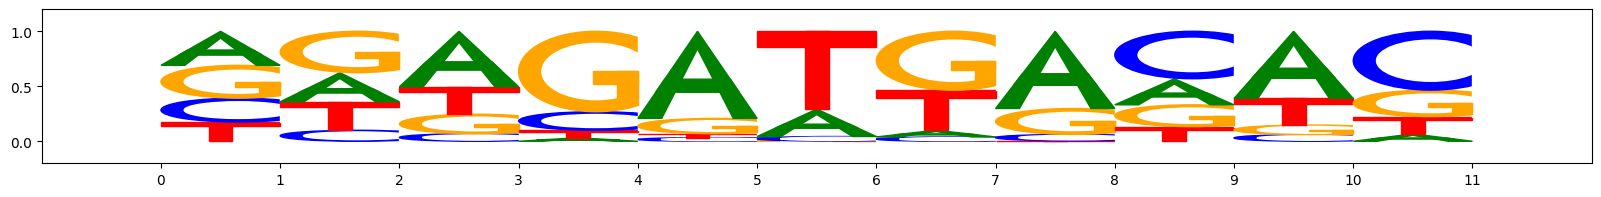

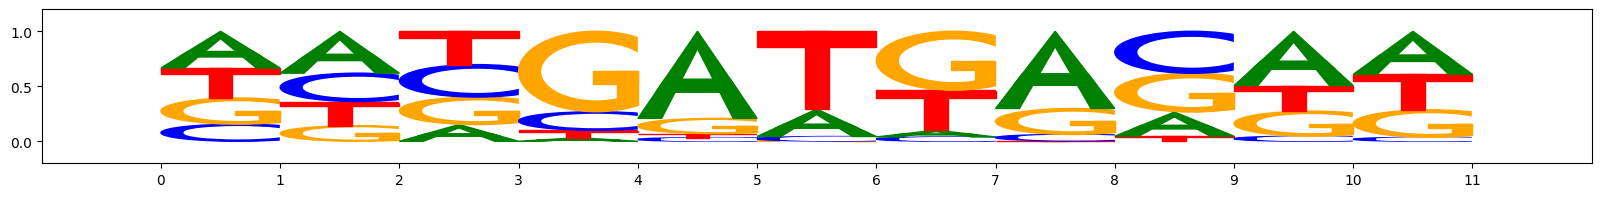

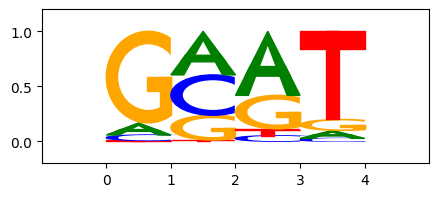

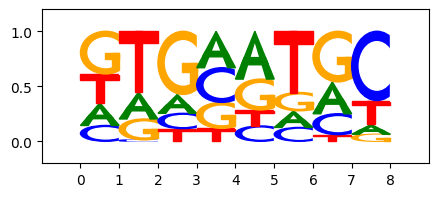

In [34]:
#motifs of varying lengths
#and of varying frequencies

import numpy as np
import modisco
from modisco.visualization import viz_sequence

rng = np.random.RandomState(1234)

def generate_ppm(rng, length, alpha):
    return rng.dirichlet(alpha*np.ones(4), size=length)

def gen_motif_with_diff_flanks(rng, core_len, core_alpha,
                                    flank_len, flank_alpha):
  motifcore = generate_ppm(rng, length=core_len, alpha=0.5)
  motifa = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                motifcore,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  motifb = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                motifcore,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  return motifa, motifb

def gen_motif_with_lower_ic_and_diff_flanks(rng, core_len, core_alpha, flank_len,
                                            flank_alpha, core_pc):
  motif_core = generate_ppm(rng, length=core_len, alpha=core_alpha)
  degraded_core = (motif_core +
                   np.array([core_pc, core_pc,
                             core_pc, core_pc])[None,:])/(1.0 + core_pc*4)
  motifa = np.concatenate([
              generate_ppm(rng, length=flank_len, alpha=flank_alpha),
                degraded_core,
              generate_ppm(rng, length=flank_len, alpha=flank_alpha)])
  return motif_core, motifa

motif1a, motif1b = gen_motif_with_diff_flanks(
                      rng=rng, core_len=5,
                      core_alpha=0.5, flank_len=3, flank_alpha=2.0)
viz_sequence.plot_weights(motif1a)
viz_sequence.plot_weights(motif1b)


motif2a, motif2b = gen_motif_with_lower_ic_and_diff_flanks(
                      rng=rng, core_len=4,
                      core_alpha=0.4, flank_len=2, flank_alpha=1.0,
                      core_pc=0.2) #core_pc is 'core_pseudocount'

viz_sequence.plot_weights(motif2a, figsize=(5,2))
viz_sequence.plot_weights(motif2b, figsize=(5,2))

"""motif3 = np.concatenate([generate_ppm(rng, length=3, alpha=2.0),
                         generate_ppm(rng, length=9, alpha=0.5),
                         generate_ppm(rng, length=3, alpha=2.0)])
viz_sequence.plot_weights(motif3)

motif4 = np.concatenate([generate_ppm(rng, length=2, alpha=2.0),
                         generate_ppm(rng, length=11, alpha=0.7),
                         generate_ppm(rng, length=2, alpha=2.0)])
viz_sequence.plot_weights(motif4)

motif5 = np.concatenate([generate_ppm(rng, length=1, alpha=2.0),
                         generate_ppm(rng, length=13, alpha=0.7),
                         generate_ppm(rng, length=1, alpha=2.0)])
viz_sequence.plot_weights(motif5)

motif6 = np.concatenate([generate_ppm(rng, length=5, alpha=0.5),
                         generate_ppm(rng, length=5, alpha=2.0),
                         generate_ppm(rng, length=5, alpha=0.5)])
viz_sequence.plot_weights(motif6)"""


#motifs = [motif2a, motif2b]
motifs = [motif1a, motif1b, motif2a, motif2b]#, motif3, motif4, motif5, motif6]

In [35]:
#generate simulate sequences
#Here we just generate random background sequences and score them according to
# the PWM, because even "random" sequences tend to be functional
from importlib import reload
import simdna
reload(simdna.synthetic.substringgen)
#reload(simdna.synthetic.embedders)
from simdna.simdnautil.pwm import PWM
import simdna.synthetic as sn
import simdna

import numpy as np
np.random.seed(1234)
from simdna import random
random.seed(1234)

bgsimulator = sn.EmbedInABackground(
    backgroundGenerator=sn.ZeroOrderBackgroundGenerator(
        seqLength=100,
        discreteDistribution={'A':0.27, 'C':0.23, 'G':0.23, 'T': 0.27}),
        embedders=[])

#sn.print_sequences(
#    outputFileName="bgsim1.simdna",
#    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=1000),
#    includeEmbeddings=True)

sn.print_sequences(
    outputFileName="bgsim2.simdna",
    sequenceSetGenerator=sn.GenerateSequenceNTimes(bgsimulator, N=100),
    includeEmbeddings=True)

In [36]:
#simdata = sn.read_simdata_file("mysim.simdna")
#bgdata = sn.read_simdata_file("bgsim.simdna")

#bgdata1 = sn.read_simdata_file("bgsim1.simdna")
bgdata2 = sn.read_simdata_file("bgsim2.simdna")

In [37]:
#seqs = simdata.sequences

#one-hot encode the seqs
import numpy as np
lookup = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1]}
def onehotencode_seqs(seqs):
  to_return = []
  for seq in seqs:
    to_return.append([lookup[letter] for letter in seq])
  return np.array(to_return)

#fg_onehot_seqs = onehotencode_seqs(simdata.sequences)
#bg_onehot_seqs = onehotencode_seqs(bgdata.sequences)

#bg1_onehot_seqs = onehotencode_seqs(bgdata1.sequences)
bg2_onehot_seqs = onehotencode_seqs(bgdata2.sequences)

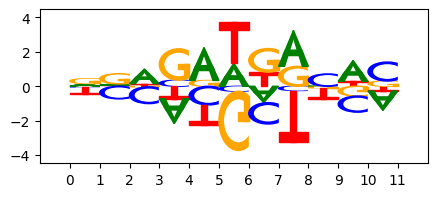

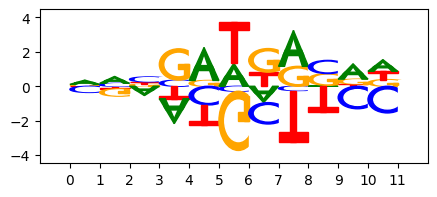

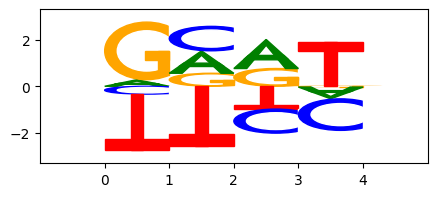

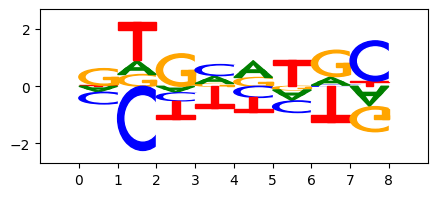

In [38]:
#score each sequence with the log-odds matrix of each pfm
background = np.array([0.27, 0.23, 0.23, 0.27])
pwms = [np.log(motif/background) for motif in motifs]
for pwm in pwms:
  viz_sequence.plot_weights(pwm - np.mean(pwm, axis=-1)[:,None], figsize=(5,2))

In [39]:
#scan each sequence with the rolling window sums.
import modisco
import numpy as np
import scipy
from collections import namedtuple


PwmHit = namedtuple("PwmHit", ["seq_idx", "pwm_start", "pwm_end", "which_pwm",
                                         "logodds_score"])


def get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                         pwm_offsets, pwm_lengths, competition_window,
                         seq_idx):
    #Greedily decide which motifs get to bind
    #Pwm offsets should be the left padding that was applied to the logodds
    # scores for that particular pwm (depends on the pwm length)
    #seq_idx just to insert into the hit
    maxlogodds_copy = np.copy(seq_pwm_axis_maxlogodds)
    sorted_positions = np.argsort(-maxlogodds_copy)

    pwm_hits = []
    for pos in sorted_positions:
        logodds_score = maxlogodds_copy[pos]
        if (logodds_score <= 0): #avoid 'less likely than bg' hits for this sim
            continue
        which_pwm = seq_pwm_axis_argmax[pos]
        #we want pwm_hits to represent the pwm start, hence the subtraction
        # of pwm_offsets
        pwm_start = pos-pwm_offsets[which_pwm]
        pwm_hits.append(PwmHit(seq_idx=seq_idx,
                               pwm_start=pwm_start,
                               pwm_end=pwm_start+pwm_lengths[which_pwm],
                               which_pwm=which_pwm,
                               logodds_score=logodds_score))
        clearance_start = pos - int(competition_window/2.0)
        clearance_end = clearance_start + competition_window
        maxlogodds_copy[clearance_start:clearance_end] = 0
    return pwm_hits


def scan_sequences(onehot_seqs, pwms):
  logodds_scans = []
  #pwm_scans = []
  for pwm in pwms:
    logodds_scans.append(modisco.util.compute_pwm_scan(onehot_seq=onehot_seqs,
                                                       weightmat=pwm))
    #pwm_scans.append( np.exp(expfactor*scipy.special.expit(logodds_scans[-1]+mu)) )
  return logodds_scans#, pwm_scans


def get_competitive_pwm_hits(onehot_seqs, pwms, competition_window):
    #Scan the sequences for logodds. Then:
    # (1) simulate competitive binding, in that only one motif is allowed to bind
    # in a window of length "competition_window" (centered at the motif)
    # (2) Decide which motif gets to bind greedily.

    logodds_scans = scan_sequences(onehot_seqs=onehot_seqs, pwms=pwms)
    pwm_lengths = [len(x) for x in pwms]

    #When a sequences is scanned,
    # the length of the result is orig_len-(windowlen-1). So we distribute
    # (windowlen-1) evenly on either side to make up for it.
    padded_logodds_scans = []
    pwm_offsets = [] #record the left-padding applied
    for (logodds_scan, pwm_len) in zip(logodds_scans, pwm_lengths):
      pwm_offset = int((pwm_len-1)/2.0)
      pwm_offsets.append(pwm_offset)
      padded_logodds_scans.append(
          np.pad(np.array(logodds_scan), (
            (0,0), (pwm_offset, (pwm_len-1)-pwm_offset )))
      )
    #assert that after padding they are all the same length. This will also make
    # the scores represent the score at the center of the pwm hit rather than
    # at the start.
    assert len(set(x.shape[1] for x in padded_logodds_scans)) == 1
    #make them all one numpy array so we can take an argmax over the pwm axis
    padded_logodds_scans = np.array(padded_logodds_scans)
    pwm_axis_argmax = np.argmax(padded_logodds_scans, axis=0)
    pwm_axis_maxlogodds = np.max(padded_logodds_scans, axis=0)
    allseq_pwm_hits = [
      get_pwm_hits_for_seq(seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds,
                           pwm_offsets=pwm_offsets, pwm_lengths=pwm_lengths,
                           competition_window=competition_window,
                           seq_idx=seq_idx)
      for (seq_idx, (seq_pwm_axis_argmax, seq_pwm_axis_maxlogodds)) in
      enumerate(zip(pwm_axis_argmax, pwm_axis_maxlogodds))
    ]

    #reorganize to be pwm-to-hits
    pwm_to_hits = [[] for pwm in pwms]
    for seq_idx, pwm_hits_for_seq in enumerate(allseq_pwm_hits):
      for pwm_hit in pwm_hits_for_seq:
        pwm_to_hits[pwm_hit.which_pwm].append(pwm_hit)

    return allseq_pwm_hits, pwm_to_hits


COMPETITION_WINDOW = max([len(x) for x in pwms])

#(fg_allseq_pwm_hits, fg_pwm_to_hits) = get_competitive_pwm_hits(
#    onehot_seqs=fg_onehot_seqs, pwms=pwms,
#    competition_window=COMPETITION_WINDOW)
#(bg1_allseq_pwm_hits, bg1_pwm_to_hits) = get_competitive_pwm_hits(
#    onehot_seqs=bg1_onehot_seqs, pwms=pwms,
#    competition_window=COMPETITION_WINDOW)
(bg2_allseq_pwm_hits, bg2_pwm_to_hits) = get_competitive_pwm_hits(
    onehot_seqs=bg2_onehot_seqs, pwms=pwms,
    competition_window=COMPETITION_WINDOW)

#print("sumscore hits in fg")
#print([np.sum([y.logodds_score for y in x]) for x in fg_pwm_to_hits])

#print("sumscore hits in bg1")
#print([np.sum([y.logodds_score for y in x]) for x in bg1_pwm_to_hits])

print("sumscore hits in bg2")
print([np.sum([y.logodds_score for y in x]) for x in bg2_pwm_to_hits])

#for logodds_scan in fg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits
#print("hits in bg")
#for logodds_scan in bg_logodds_scans:
#  print(np.sum(logodds_scan+mu > 0)) #instances of "positive" hits

sumscore hits in bg2
[398.43486576362056, 413.7037540650823, 710.912648690597, 639.520152486366]


In [40]:

def logodds_to_score(logodds):
  MU = -4
  EXPFACTOR = 3
  #return logodds
  #return scipy.special.expit(logodds+MU)
  return np.exp(EXPFACTOR*scipy.special.expit(logodds+MU))

def find_imp(onehot_seqs, allseq_pwm_hits, pwms, noisefold=1):
    ref = logodds_to_score(0)
    simulated_hyp_scores = np.zeros_like(onehot_seqs, dtype="float64")
    for row_idx in range(len(allseq_pwm_hits)):
      for pwm_hit in allseq_pwm_hits[row_idx]:
        assert pwm_hit.seq_idx==row_idx
        score = logodds_to_score(pwm_hit.logodds_score)
        diff_from_ref = score-ref
        assert np.sign(diff_from_ref)==np.sign(pwm_hit.logodds_score)
        scalefactor = diff_from_ref/pwm_hit.logodds_score
        simulated_hyp_scores[row_idx][
            pwm_hit.pwm_start:pwm_hit.pwm_end]\
                += pwms[pwm_hit.which_pwm]*scalefactor
    #ADD NOISE, adjusting values to be up to 2^noisefold more/less (multiplicatively)
    # from that they are up to. Sample uniformly.
    noisefold_adjustment = np.power(2, np.random.RandomState(1234).uniform(
        low=-noisefold, high=noisefold, size=simulated_hyp_scores.shape))
    simulated_actual_scores = simulated_hyp_scores*noisefold_adjustment*onehot_seqs
    return simulated_hyp_scores, simulated_actual_scores

"""fg_hyp_scores, fg_actual_scores = find_imp(onehot_seqs=fg_onehot_seqs,
                                           allseq_pwm_hits=fg_allseq_pwm_hits,
                                           pwms=pwms)"""

#bg1_hyp_scores, bg1_actual_scores = find_imp(onehot_seqs=bg1_onehot_seqs,
#                                           allseq_pwm_hits=bg1_allseq_pwm_hits,
#                                           pwms=pwms)

bg2_hyp_scores, bg2_actual_scores = find_imp(onehot_seqs=bg2_onehot_seqs,
                                           allseq_pwm_hits=bg2_allseq_pwm_hits,
                                           pwms=pwms)

bg


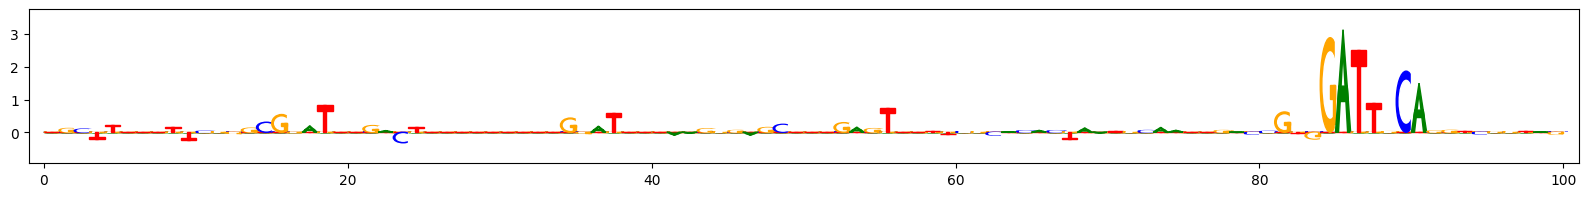

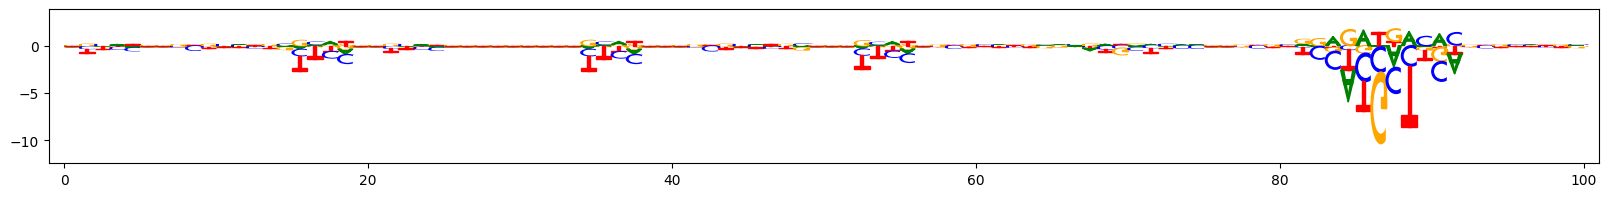

bg


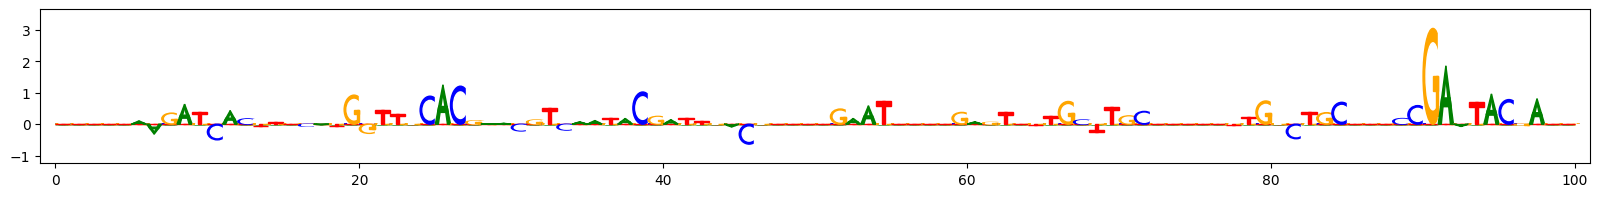

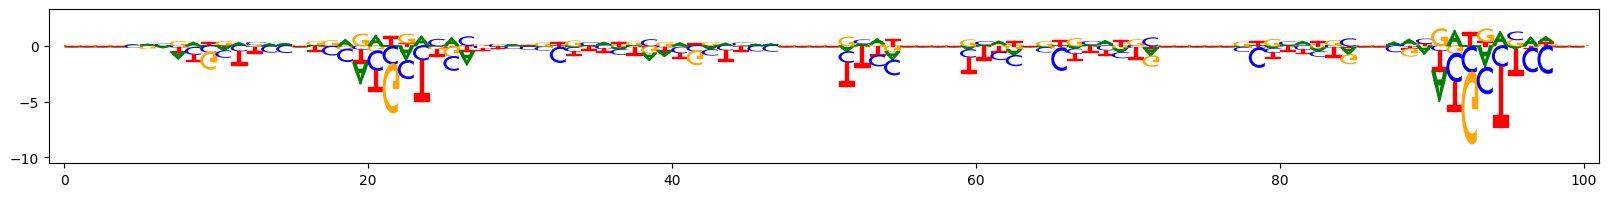

In [41]:
from modisco.visualization import viz_sequence

for i in range(2):
  print("bg")
  viz_sequence.plot_weights(bg2_actual_scores[i], subticks_frequency=20)
  viz_sequence.plot_weights(bg2_hyp_scores[i], subticks_frequency=20)
  #print("bg")
  #viz_sequence.plot_weights(bg_actual_scores[i], subticks_frequency=20)
  #viz_sequence.plot_weights(bg_hyp_scores[i], subticks_frequency=20)

In [42]:
from modisco.core import SeqletCoordinates

#identify (centered) seqlet coordinates for each motif
seqlet_len = 15
pwm_seqlet_coords = [ [] for pwm in pwms]

for pwm_hits in bg2_pwm_to_hits:
    for pwm_hit in pwm_hits:
        if (pwm_hit.logodds_score > 2):
          pwm_len = pwm_hit.pwm_end - pwm_hit.pwm_start
          left_flank = int((seqlet_len - pwm_len)/2.0)
          seqlet_start = pwm_hit.pwm_start - left_flank
          seqlet_end = seqlet_start + seqlet_len
          if (seqlet_start >= 0) and (seqlet_end <= bg2_onehot_seqs.shape[1]):
            pwm_seqlet_coords[pwm_hit.which_pwm].append(
                SeqletCoordinates(example_idx=pwm_hit.seq_idx,
                                  start=seqlet_start, end=seqlet_end,
                                  is_revcomp=False))

#get the seqlets from the trackset object
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
              task_names=["task0"], contrib_scores={"task0": bg2_actual_scores},
              hypothetical_contribs={"task0": bg2_hyp_scores},
              one_hot=bg2_onehot_seqs, revcomp=False)
pwm_seqlets = [track_set.create_seqlets(coords=coords)
               for coords in pwm_seqlet_coords]



In [49]:
print(sum([len(x) for x in pwm_seqlets]))
#do a stratified sampling
#num_per_pwm = np.array([200, 40, 200, 40, 150, 0, 0, 0])
#num_per_pwm = np.array([150, 50])
num_per_pwm = np.array([70, 70, 70, 70])
assert len(num_per_pwm)==len(pwm_seqlets)

def subsample_list(the_list, num_to_sample):
    subsample_idxs = np.random.RandomState(1234).choice(
      a=np.arange(len(the_list)), replace=False,
      size=min(num_to_sample,len(the_list)) )
    subsamp_items = [the_list[i] for i in subsample_idxs]
    return subsamp_items

sub_seqlets = [x for (the_pwm_seqlets, num_to_sample)
                     in zip(pwm_seqlets, num_per_pwm)
                     for x in subsample_list(the_pwm_seqlets, num_to_sample) ]
sub_seqlets_whichpwms = np.array([pwm_idx for pwm_idx in range(len(num_per_pwm))
                                  for x in range(num_per_pwm[pwm_idx])])

from collections import Counter
print(Counter(sub_seqlets_whichpwms))


420
Counter({0: 70, 1: 70, 2: 70, 3: 70})


Now compare crosscorr v contin jacc

In [50]:
# compute the pairwise sims using continjacc
def compute_pairwise_sims_continjacc(seqlets):
#    print("Num seqlets:", len(seqlets))
    #get the emebedding
    pattern_comparison_settings =(
        modisco.affinitymat.core.PatternComparisonSettings(
                    track_names=["task0_hypothetical_contribs",
                                "task0_contrib_scores"],
                    track_transformer=modisco.affinitymat.L1Normalizer(),
                    min_overlap=0.7))
    affmat_from_seqlets_with_nn_pairs =(
        modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(
            pattern_comparison_settings=pattern_comparison_settings,
            sim_metric_on_nn_pairs=(
                modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(
                    n_cores=10,
                    cross_metric_single_region=
                        modisco.affinitymat.core.CrossContinJaccardSingleRegion()))))
    return affmat_from_seqlets_with_nn_pairs(seqlets=seqlets)


all_pairwise_sims = compute_pairwise_sims_continjacc(sub_seqlets)

nearest_neighbors = np.argsort(-all_pairwise_sims, axis=-1)
nn_pairwise_sims = np.array([
    row[nn] for row,nn in zip(all_pairwise_sims, nearest_neighbors) ])


Launching nearest neighbors affmat calculation job
MEMORY 0.3953664
Parallel runs completed
MEMORY 0.403279872
Job completed in: 1.5 s
MEMORY 0.403300352


In [51]:
def compute_pairwise_sims_crosscorr(seqlets):
#    print("Num seqlets:", len(seqlets))
    #get the emebedding
    pattern_comparison_settings =(
        modisco.affinitymat.core.PatternComparisonSettings(
                    track_names=["task0_hypothetical_contribs",
                                 "task0_contrib_scores"],
                    track_transformer=modisco.affinitymat.MagnitudeNormalizer(),
                    min_overlap=0.7))
    affmat_from_seqlets_with_nn_pairs =(
        modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(
            pattern_comparison_settings=pattern_comparison_settings,
            sim_metric_on_nn_pairs=(
                modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(
                    n_cores=10,
                    cross_metric_single_region=
                        modisco.affinitymat.core.CrossCorrSingleRegion()))))
    return affmat_from_seqlets_with_nn_pairs(seqlets=seqlets)

all_pairwise_sims_crosscorr = compute_pairwise_sims_crosscorr(sub_seqlets)
nearest_neighbors_crosscorr = np.argsort(-all_pairwise_sims_crosscorr, axis=-1)
nn_pairwise_sims_crosscorr = np.array([
    row[nn] for row,nn in zip(all_pairwise_sims_crosscorr, nearest_neighbors_crosscorr) ])

Launching nearest neighbors affmat calculation job
MEMORY 0.403300352
Parallel runs completed
MEMORY 0.410292224
Job completed in: 0.61 s
MEMORY 0.410222592


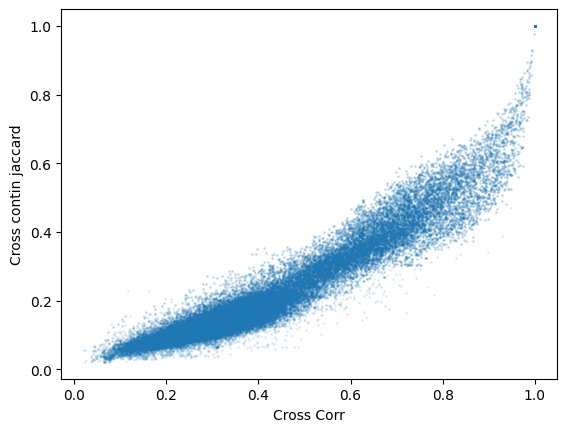

In [52]:
from matplotlib import pyplot as plt
plt.scatter(all_pairwise_sims_crosscorr.ravel(), all_pairwise_sims.ravel(), s=1, alpha=0.1)
plt.xlabel("Cross Corr")
plt.ylabel("Cross contin jaccard")
plt.show()

Pwm 0 within v between - crosscontin
Within vs between auroc 0.9228078578370124


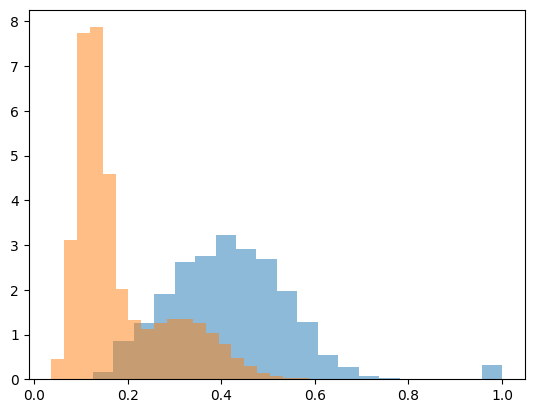

Pwm 0 within v between - crosscorr
Within vs between auroc 0.8684729279466888


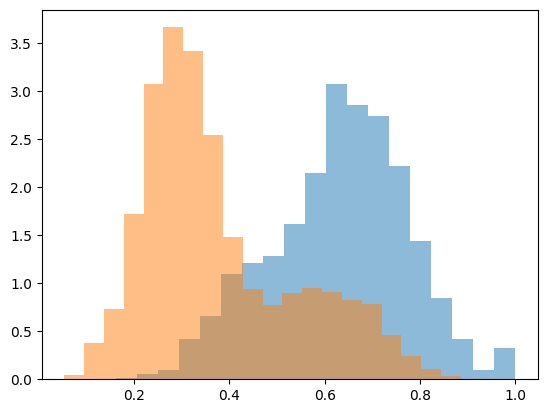

Pwm 1 within v between - crosscontin
Within vs between auroc 0.8848223379147577


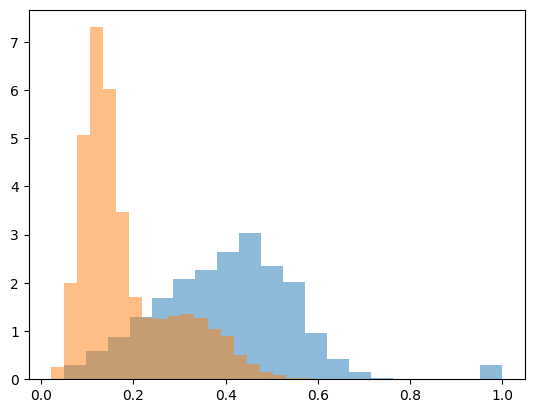

Pwm 1 within v between - crosscorr
Within vs between auroc 0.8486680549770927


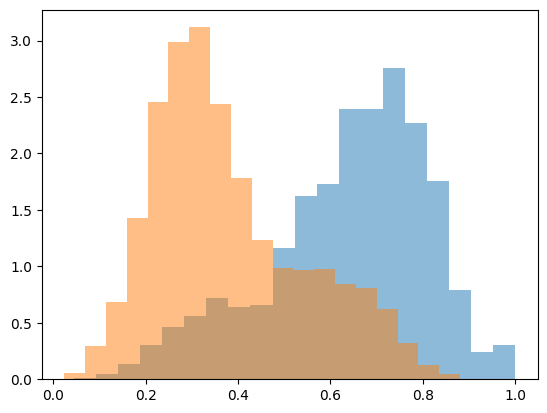

Pwm 2 within v between - crosscontin
Within vs between auroc 0.9474634180202693


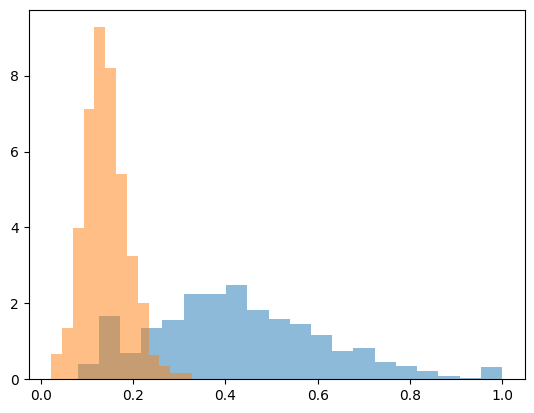

Pwm 2 within v between - crosscorr
Within vs between auroc 0.9297625850340137


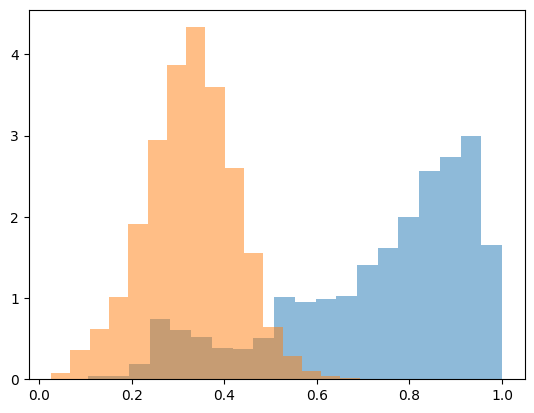

Pwm 3 within v between - crosscontin
Within vs between auroc 0.8310303901152298


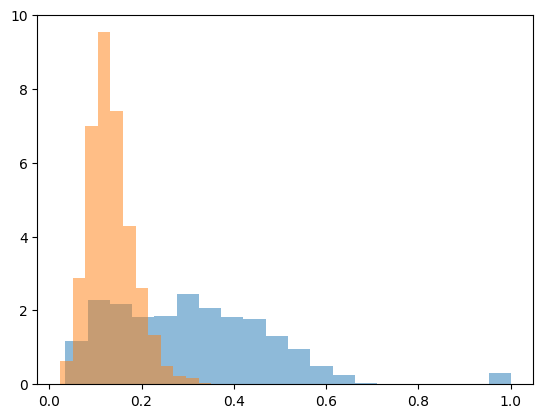

Pwm 3 within v between - crosscorr
Within vs between auroc 0.7808740108288212


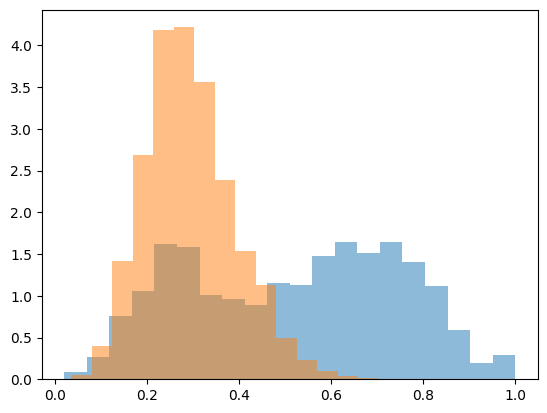

In [53]:
from matplotlib import pyplot as plt
import sklearn.metrics

#histogram within-cluster sims for different classes
for i in range(len(pwms)):
  print("Pwm",i,"within v between - crosscontin")
  within_crosscontin = (all_pairwise_sims[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms==i]).ravel()
  between_crosscontin = (all_pairwise_sims[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms!=i]).ravel()
  print("Within vs between auroc", sklearn.metrics.roc_auc_score(y_true=[1 for x in within_crosscontin]+[0 for x in between_crosscontin], y_score=list(within_crosscontin)+list(between_crosscontin)) )
  plt.hist(within_crosscontin, bins=20, alpha=0.5, density=True)
  plt.hist(between_crosscontin, bins=20, alpha=0.5, density=True)
  plt.show()
  print("Pwm",i,"within v between - crosscorr")
  within_crosscorr = (all_pairwise_sims_crosscorr[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms==i]).ravel()
  between_crosscorr = (all_pairwise_sims_crosscorr[sub_seqlets_whichpwms==i,:][:,sub_seqlets_whichpwms!=i]).ravel()
  print("Within vs between auroc", sklearn.metrics.roc_auc_score(y_true=[1 for x in within_crosscorr]+[0 for x in between_crosscorr], y_score=list(within_crosscorr)+list(between_crosscorr)) )
  plt.hist(within_crosscorr, bins=20, alpha=0.5, density=True)
  plt.hist(between_crosscorr, bins=20, alpha=0.5, density=True)
  plt.show()